In [1]:
 import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
%matplotlib inline

2024-08-19 14:50:31.194660: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 14:50:31.198042: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 14:50:31.208680: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 14:50:31.226794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 14:50:31.231790: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 14:50:31.245081: I tensorflow/core/platform/cpu_feature_gu

In [3]:
 # Read in the data.
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1,1)


In [4]:
# One-hot-encoding for y.
y = to_categorical(y0, num_classes=3)

In [5]:
 # View as DataFrame.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species_0','Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [6]:
 # Scale the X data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [7]:
 # Split the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)
n_vars = X_train.shape[1]

In [8]:
 # Add layers on a Sequential object.
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units = 3, activation="softmax")) #units = N# of output variables.


/home/visitor14/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Summary of the model.
my_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
 # Hyperparameters.
n_epochs = 500
batch_size = 10
learn_rate = 0.005


In [11]:
 # Define the optimizer and then compile.
my_optimizer=Adam(learning_rate = learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer,metrics=["accuracy"])

In [12]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size =batch_size, validation_split = 0.2, verbose = 0)

In [13]:
# View the keys.
my_summary.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

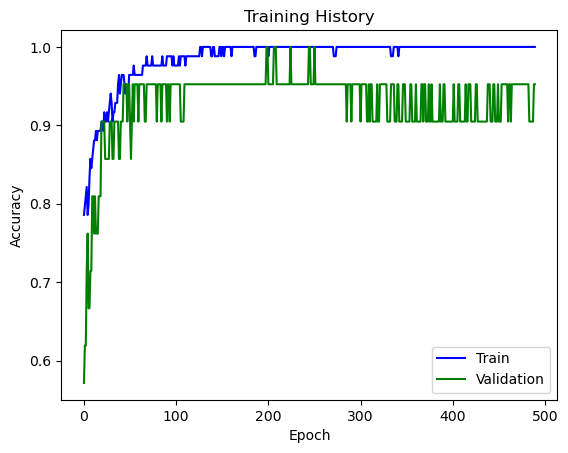

In [14]:
 # Visualize the training history.
n_skip = 10 # Skip the first few steps.
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
